# **3. Machine Learning for Classification**

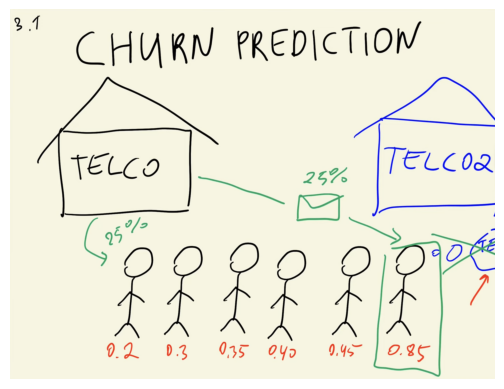

In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display image
img = mpimg.imread('/Users/elhamkhorasani/Desktop/12.png')
plt.imshow(img)
plt.axis('off')  # Hide axes if needed
plt.show()

logistic regression to predict churn

# **3.1 Data preparation**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [151]:
!wget $data -O data-week-3.csv 

--2024-10-12 21:39:35--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.1s    

2024-10-12 21:39:36 (7.01 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [152]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
len(df)

7043

In [154]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [155]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [156]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [157]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [158]:
# totalcharges should be numbers and not object, there are numbers but the type is object which means some of the values are not numbers
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [159]:
pd.to_numeric(df.totalcharges, errors= 'coerce') # ignore the not numeric values

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [160]:
df[tc.isnull()][['customerid', 'totalcharges']] 
# totalcharges here are missing

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [161]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0) # fill them with zeros

In [162]:
df[tc.isnull()][['customerid', 'totalcharges']] 

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [163]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [164]:
# yes is 1 and no is 0 because we need int data 
df.churn = (df.churn == 'yes').astype(int)

# **3.2 Setting up validation framework**

### Performing train/test/validation split wiht Scikit-Learn 


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
# Splitting the dataset into training, validation, and test sets.
# First, we split the original DataFrame 'df' into 'df_train_full' (80% of the data) and 'df_test' (20% of the data) using train_test_split.
# The 'random_state' ensures reproducibility.
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [167]:
# Next, we split 'df_train_full' into 'df_train' (75% of the remaining data)
# and 'df_val' (25% of the remaining data) using train_test_split.
# This results in 'df_train' being 60% of the original data and 'df_val' being 20%.
# Again, the 'random_state' ensures reproducibility.
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [168]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [169]:
df_train = df_train.reset_index(drop =True)
df_val = df_train.reset_index(drop =True)
df_test = df_test.reset_index(drop =True)

In [170]:
# Extracting the target variable 'churn' from each of the datasets.
# '.values' is used to convert the 'churn' column into a NumPy array, 
# which is often required for training machine learning models.
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [171]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1448-cywkc,female,0,yes,yes,58,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.20,6225.40,0
1,6127-isgtu,female,0,yes,no,16,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,84.95,1378.25,1
2,3279-dyzqm,male,0,yes,yes,71,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.45,1378.45,0
3,8485-gjcdn,female,1,no,no,5,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,69.05,318.50,1
4,2195-zrvax,female,0,yes,no,47,yes,no,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,85.30,4045.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,4778-izarl,male,0,yes,no,63,yes,no,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,credit_card_(automatic),110.10,6705.70,0
4221,4342-hentk,female,1,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.65,142.35,1
4222,6598-rffvi,male,0,no,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,credit_card_(automatic),19.30,28.30,1
4223,8204-tifgj,female,0,no,no,23,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,bank_transfer_(automatic),20.30,470.60,0


##### After extracting the 'churn' column as the target variable (y_train, y_val, y_test),
##### we remove the 'churn' column from the training, validation, and test DataFrames.
##### This is to ensure that the target variable is not included as a feature
##### when training the model, as it would lead to data leakage.

In [172]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# **3.3 EDA**

In [208]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [209]:
df_train_full.isnull().sum() # there is no missing values in the dataset

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [210]:
df_train_full.churn # target variable 

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5634, dtype: int64

In [211]:
df_train_full.churn.value_counts(normalize =True) #normalize is looking for the percentage


churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

### churn rate is 0.269968 which is ≈ 27%.

In [212]:
global_chrun_rate = df_train_full.churn.mean()
round (global_chrun_rate, 2)

0.27

In [213]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [214]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [215]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# **3.4 Feature importanec: Churn rate and risk ratio**

In [238]:
# Calculating the average churn rate for female customers.
# This shows the proportion of female customers who churned.
churn_female = df_train_full[df_train_full.gender == 'female'].churn.mean()
churn_female 

0.27682403433476394

In [240]:
# Calculating the average churn rate for male customers.
# This shows the proportion of male customers who churned.
churn_male = df_train_full[df_train_full.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [232]:
df_train_full.partner.value_counts()
# There are 2,932 customers without a partner and 2,702 customers with a partner.

partner
no     2932
yes    2702
Name: count, dtype: int64

In [242]:
# Calculating the average churn rate for customers who have a partner.
# This shows the proportion of partnered customers who churned.
churn_partner = df_train_full[df_train_full.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [237]:
# Calculating the average churn rate for customers who do not have a partner.
# This shows the proportion of non-partnered customers who churned.
churn_no_partner = df_train_full[df_train_full.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

### **Analysis:**
#### **Gender-Based Churn Rates:**

Female customers have a churn rate of approximately 27.68%.
Male customers have a slightly lower churn rate of about 26.32%.
This suggests that, on average, female customers are slightly more likely to churn than male customers.

#### **Partnership Status and Churn Rates:**

Customers with a partner have a churn rate of approximately 20.50%, which is significantly lower than those without a partner.
Customers without a partner have a churn rate of about 32.98%.
This indicates that customers without a partner are more likely to churn than those with a partner, suggesting that having a partner might be associated with greater customer retention.

In [246]:
global_chrun_rate - churn_partner

0.06493474245795922